In [4]:
# Predict the species of flower based on flower's botanical prop

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [16]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#Check whether the dataset is a balanced dataset or not

In [6]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
features = data.iloc[:,:-1].values
label = data.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=23)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
model.score(X_train,y_train)

0.9583333333333334

In [11]:
model.score(X_test,y_test)

1.0

# Dealing with Multiclass Label Classification Scenario

### Applicable for ROC and PR Viz and not for Modelling

In [ ]:
#Since this is a multi-class classification, we need to ensure our labels follow binary labels. 
#To achieve this target, we can use OneVsRestClassifier
#Reqt for OneVsRestClassifier
# 1. Your labels must be numeric in nature
# 2. Your model algo must support predict_proba and decision_function

In [14]:
#Step1: Encode our labels
#Ensure label is written in ascending order
from sklearn.preprocessing import label_binarize
y = label_binarize(label, classes=['setosa','versicolor','virginica'])

In [17]:
#Step2: Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                y,
                                                test_size=0.2,
                                                random_state=23)

In [18]:
#Step3: Create LogisticRegression OneVsRestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

multiClassModel = OneVsRestClassifier(LogisticRegression())

#Goal is to get the prob values of 1 (Achievable by using DecisionFunction)

y_score = multiClassModel.fit(X_train,y_train).decision_function(features)



//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
len(data.species.unique())

3

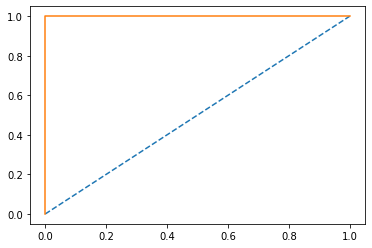

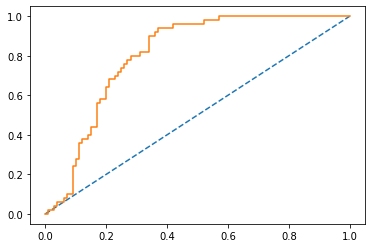

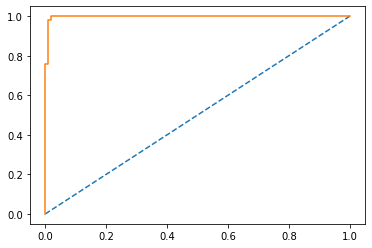

In [24]:
#Plot ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
    
fpr = dict()
tpr = dict()
auc = dict()


#Calc fpr tpr and auc for each model

for i in range(0,len(data.species.unique())):
    fpr[i],tpr[i],_ = roc_curve(y[:,i] , y_score[:,i] )
    auc[i] = roc_auc_score(y[:,i] , y_score[:,i] )
    

for i in range(0,len(data.species.unique())):
    plt.figure()
    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(fpr[i],tpr[i])



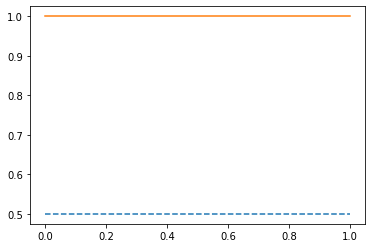

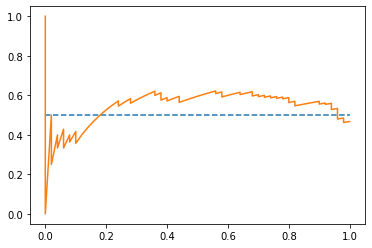

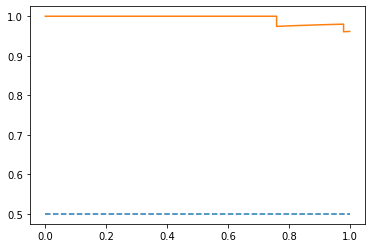

In [25]:
#PR Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

precision = dict()
recall = dict()
auc1 = dict()



for i in range(0,len(data.species.unique())):
    precision[i],recall[i],_ = precision_recall_curve(y[:,i] , y_score[:,i] )
    auc1[i] = auc(recall[i] , precision[i])
    

for i in range(0,len(data.species.unique())):
    plt.figure()
    plt.plot([0,1],[0.5,0.5], linestyle='--')
    plt.plot(recall[i],precision[i])


